# Handwritten digit recognition

 A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.


The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

### Data Understanding
Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
digits= pd.read_csv("digit-recognition.csv")
test = pd.read_csv("test.csv")

In [2]:
# about the dataset

# dimensions
print("Dimensions: ", digits.shape, "\n")

# data types
print(digits.info())

# head
digits.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# a quirky bug: the column names have a space, e.g. 'xbox ', which throws and error when indexed
print(digits.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
order = list(np.sort(digits['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


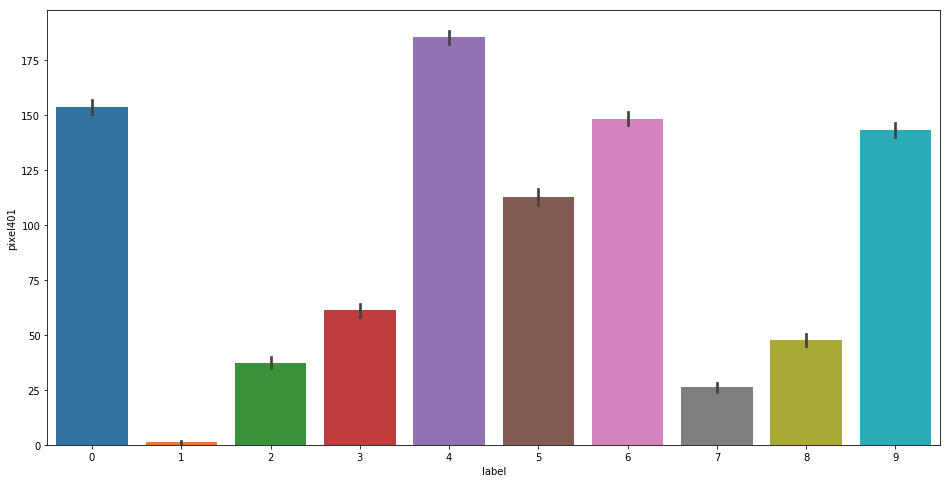

In [5]:
# basic plots: How do various attributes vary with the letters

plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel401', 
            data=digits, 
            order=order)

In [6]:
digit_means = digits.groupby('label').mean()
digit_means.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [7]:
print(digits['label'].value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [8]:
digits = digits.sample(n = 12000)

In [ ]:
digits.drop_duplicates(subset=None, keep='first', inplace=False)

In [9]:
print(digits['label'].value_counts())

1    1327
7    1280
3    1233
2    1205
0    1195
9    1176
4    1173
8    1171
6    1164
5    1076
Name: label, dtype: int64


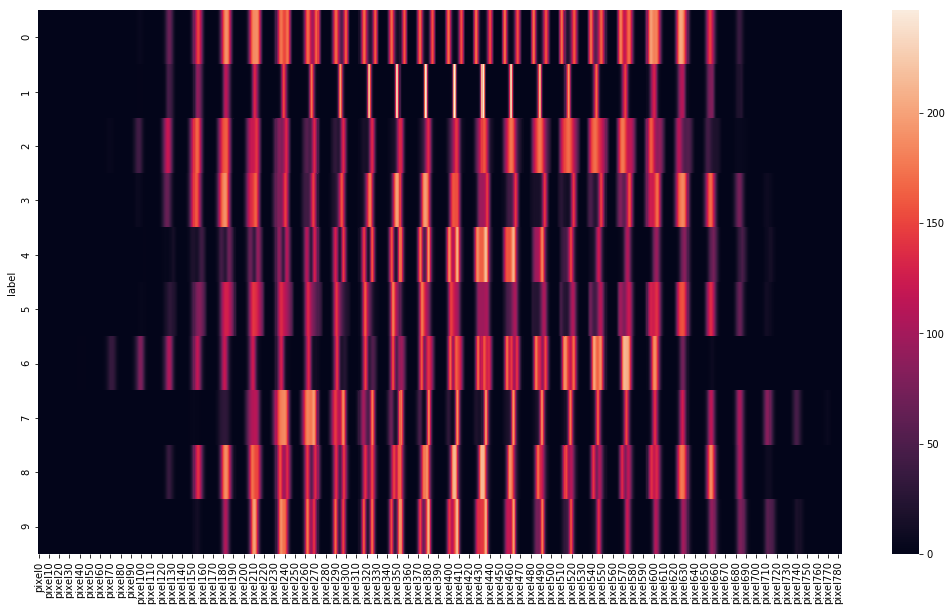

In [10]:

plt.figure(figsize=(18, 10))
sns.heatmap(digit_means)

### Data Preparation
Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to rescale the features, since they may have varying ranges. For example, here are the average values:

In [11]:
# average feature values
round(digits.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.00
pixel762    0.05
pixel763    0.12
pixel764    0.09
pixel765    0.13
pixel766    0.30
pixel767    0.45
pixel768    0.58
pixel769    0.62
pixel770    0.71
pixel771    0.67
pixel772    0.58
pixel773    0.40
pixel774    0.23
pixel775    0.12
pixel776    0.08
pixel777    0.05
pixel778    0.04
pixel779    0.00
pixel780    0.00
pixel781    0.

In [12]:
# splitting into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

In [13]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10)

# Model Building
Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [14]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [15]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9083333333333333 

[[223   0   1   1   2   3   1   0   2   0]
 [  0 257   2   1   0   2   0   0   1   1]
 [  3   3 216   1   5   1   5   3   5   0]
 [  2   0   9 222   0  13   0   3   4   3]
 [  0   1   0   0 224   1   2   0   1   7]
 [  1   2   2   7   2 187   1   0   5   1]
 [  2   0   5   0   5   3 226   0   3   0]
 [  0   1   3   7   1   0   0 242   1  13]
 [  2   5  11   8   0   9   0   1 196   3]
 [  0   0   0   5  13   1   0   8   0 187]]


##The linear model gives approx. 89% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [16]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [17]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9370833333333334 

[[221   0   5   0   0   1   5   0   1   0]
 [  0 258   1   2   0   2   0   0   0   1]
 [  1   1 228   2   2   0   0   5   3   0]
 [  1   0   7 235   0   1   1   2   3   6]
 [  0   0   1   0 226   1   1   0   2   5]
 [  0   2   4   1   1 196   2   0   2   0]
 [  1   0   6   0   0   6 229   0   2   0]
 [  0   2   9   1   2   0   0 246   0   8]
 [  3   3   6   4   0   4   1   1 211   2]
 [  0   0   4   4   2   0   0   4   1 199]]


The non-linear model rbf gives approx. 94% accuracy. Let's look at a sufficiently non-linear model 'poly' with randomly chosen hyperparameters.

In [18]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [19]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8679166666666667 

[[211   0   1   0   1   1   4   0  15   0]
 [  0 256   0   0   0   1   0   0   7   0]
 [  1   1 193   1  10   1   0   0  34   1]
 [  0   2   3 207   1   2   1   1  33   6]
 [  0   0   1   0 221   0   0   0   4  10]
 [  0   0   0   3   5 158   1   0  36   5]
 [  1   0   0   0   8   7 209   0  19   0]
 [  0   3   0   1  12   0   0 210   6  36]
 [  0   0   3   4   1   5   0   0 219   3]
 [  0   0   1   1   5   0   0   2   6 199]]


The non-linear model poly gives approx. 87% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear model rbf.

## Grid Search: Hyperparameter Tuning
Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [20]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 55.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [21]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,259.898625,0.559647,29.508557,0.843215,1,0.01,"{'C': 1, 'gamma': 0.01}",0.755208,0.755729,0.748958,...,0.754583,0.007332,12,0.999870,1.000000,0.999870,0.999740,1.000000,0.999896,0.000097
1,61.120870,0.534987,16.258007,0.671927,1,0.001,"{'C': 1, 'gamma': 0.001}",0.936979,0.918750,0.933333,...,0.929479,0.007274,4,0.969922,0.972786,0.970182,0.972526,0.968880,0.970859,0.001533
2,93.381018,0.869647,22.785432,0.584655,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.909896,0.894271,0.900521,...,0.900312,0.005989,8,0.910937,0.917448,0.917969,0.918229,0.914323,0.915781,0.002798
3,263.236267,3.240894,27.915793,0.410508,10,0.01,"{'C': 10, 'gamma': 0.01}",0.777604,0.773438,0.768229,...,0.773854,0.006122,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,51.467854,1.056054,14.966633,0.719191,10,0.001,"{'C': 10, 'gamma': 0.001}",0.942708,0.929688,0.944792,...,0.940417,0.006273,1,0.999609,0.999219,0.999089,0.999219,0.999219,0.999271,0.000177
5,40.502609,0.666270,13.625054,0.279577,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.931771,0.910937,0.924479,...,0.922396,0.006972,6,0.956510,0.959375,0.957161,0.959505,0.957031,0.957917,0.001263
6,266.964015,3.761907,29.204267,0.833255,100,0.01,"{'C': 100, 'gamma': 0.01}",0.777604,0.773438,0.768229,...,0.773854,0.006122,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,53.703471,0.796319,15.635619,0.837749,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939583,0.930208,0.943750,...,0.939479,0.005933,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,30.530411,1.697696,11.817609,1.140704,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.935937,0.913542,0.933333,...,0.928125,0.007858,5,0.993880,0.994401,0.993490,0.991667,0.993099,0.993307,0.000927
9,271.497474,2.645010,31.310834,1.170917,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.777604,0.773438,0.768229,...,0.773854,0.006122,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


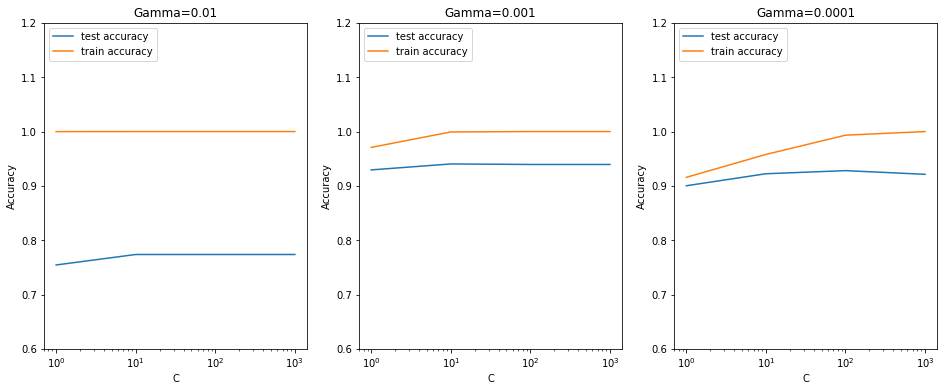

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9404166666666667 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model
Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [28]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9470833333333334 

[[222   0   4   0   0   1   5   0   1   0]
 [  0 260   1   2   0   0   0   0   0   1]
 [  2   1 230   1   2   0   0   3   3   0]
 [  1   0   5 240   0   3   0   2   1   4]
 [  0   0   1   0 228   0   2   0   1   4]
 [  0   1   2   2   0 201   0   0   2   0]
 [  1   0   4   0   0   5 233   0   1   0]
 [  0   2   9   2   2   0   0 248   0   5]
 [  2   2   6   7   0   3   1   1 209   4]
 [  0   0   3   3   1   1   0   4   0 202]] 



### Conclusion
The accuracy achieved using a non-linear kernel (~0.95) is mush higher than that of a linear one (~0.87). We can conclude that the problem is highly non-linear in nature.